# Modelo de Aprendizaje no Superviasado
# Modelos de detección de anomalías

## Dataset: Imágenes de cepillos de dientes
## Objetivo: Entrenar un modelo que detecte si un cepillo de dientes es defectuoso
Índice<a name="indice"></a>
* [1 Prepocesado de datos](#1)
    * [1.1 Importación de librerías](#1_1)
    * [1.2 Carga del Dataset](#1_2)
* [2 Análisis Exploratorio de datos](#2)
    * [2.1 Estadísitcas descriptivas](#2_1)
* [3 Diseño de características](#3)
    * [3.1 Tratamiento de datos nulos](#3_1)
    * [3.2 Transformación de características](#3_2)
    * [3.3 Selección de características relevante](#3_3)
    * [3.4 Tratamiento de outliers](#3_4)
    * [3.5 Tratamiento de correlación](#3_5)
    * [3.6 Normalización](#3_6)
* [4 Local Outlier Factor (LOF)](#4) 
* [5 Isolation Forest](#5)

## _Descripción de la fuente_
El dataset contiene 66 imágenes de 128x128. Hay 60 imágenes correctas y 6 defectuosas.

In [36]:
import pandas as pd
import numpy as np


from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

import os

from PIL import Image

import matplotlib.pyplot as plt
                
def cargar_imagenes(carpeta):
    # Devuelve un Array X con los píxeles de cada imagen 
    # y un Array Y que indica si la imagen es defectuosa o no, para hacer comprobaciones.
    # Sabemos si es defectuosa, porque el nombre del fichero empieza por d
    X=[]
    Y=[]
    for root, dirs, files in os.walk(carpeta):
        for file in files:
            if file.endswith('.png'):
                path = os.path.join(root, file)
                img = Image.open(path)
                img = img.resize((8,8)) # redimensionamos de 128x128 a 8x8
                img_array = np.array(img)
                X.append(img_array)
                if file.startswith('d'):
                    Y.append(1)
                else:
                    Y.append(0)

    X = np.array(X)
    Y = np.array(Y)
    return X, Y

In [37]:
# Cargar carpeta imágenes
x,y = cargar_imagenes('imagenes')

In [38]:
# Cuantas muestras hay
len(x)

66

In [39]:
# Cada muestra es una matriz de píxeles de 8x8
# Cada píxel está representado por 3 valores
len(x[0])

8

In [40]:
len(x[0][0])

8

In [41]:
x[0][0][0]

array([18, 16, 22], dtype=uint8)

In [42]:
# Creamos dataframe. 

In [43]:
df = pd.DataFrame(x.reshape(66,-1))
df

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,18,16,22,16,15,22,16,16,22,90,...,107,11,11,17,15,15,20,16,16,21
1,17,16,22,15,15,21,15,15,21,86,...,105,11,11,17,16,15,20,18,17,21
2,17,16,22,15,14,20,15,16,22,91,...,108,11,11,17,16,15,21,18,17,21
3,17,17,23,16,15,21,15,15,22,89,...,107,11,11,17,16,15,21,17,16,21
4,16,16,22,15,15,21,16,16,22,89,...,109,11,12,18,16,16,21,17,16,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,18,17,23,16,16,22,16,16,23,85,...,115,13,14,20,15,15,21,17,16,21
62,11,10,12,9,8,11,9,9,12,87,...,83,17,14,16,9,9,11,11,10,12
63,15,14,19,13,13,18,13,14,19,85,...,101,8,8,13,13,12,17,14,13,17
64,19,18,26,18,17,24,19,19,26,93,...,103,13,13,21,17,17,23,19,18,24


# 4 Local Outlier Factor (LOF) <a name="4"></a>
[Índice](#indice)

In [77]:
modelo = LocalOutlierFactor(novelty=True, n_neighbors=5)
modelo.fit(df)

LocalOutlierFactor(n_neighbors=5, novelty=True)

In [78]:
y_pred = modelo.predict(df)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1])

In [79]:
# Crear un df con df, añadiendo y_pred
dfCalculado = pd.DataFrame(y_pred,columns=['Pred'])
dfAux = pd.DataFrame(y,columns=['Class'])
dfCalculado = pd.concat([df, dfAux, dfCalculado],axis=1)
dfCalculado

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,Class,Pred
0,18,16,22,16,15,22,16,16,22,90,...,11,17,15,15,20,16,16,21,0,1
1,17,16,22,15,15,21,15,15,21,86,...,11,17,16,15,20,18,17,21,0,1
2,17,16,22,15,14,20,15,16,22,91,...,11,17,16,15,21,18,17,21,0,1
3,17,17,23,16,15,21,15,15,22,89,...,11,17,16,15,21,17,16,21,0,1
4,16,16,22,15,15,21,16,16,22,89,...,12,18,16,16,21,17,16,21,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,18,17,23,16,16,22,16,16,23,85,...,14,20,15,15,21,17,16,21,1,-1
62,11,10,12,9,8,11,9,9,12,87,...,14,16,9,9,11,11,10,12,1,-1
63,15,14,19,13,13,18,13,14,19,85,...,8,13,13,12,17,14,13,17,1,-1
64,19,18,26,18,17,24,19,19,26,93,...,13,21,17,17,23,19,18,24,1,1


In [80]:
dfCalculado['Class'].value_counts()/len(dfCalculado)*100

0    90.909091
1     9.090909
Name: Class, dtype: float64

In [81]:
dfCalculado['Pred'].value_counts()/len(dfCalculado)*100

 1    89.393939
-1    10.606061
Name: Pred, dtype: float64

In [82]:
# Métrica del modelo (estamos haciendo trampa ya que en un caso real no tendríamos la variable Class)
# Vamos a utlizar las mismas métricas que un clasificación binaria, ya que es como si estuviéramso
# haciendo una clasificación 0-Normal, 1-Anómala

# Tranformar Target para que tome valores 0 si es normal o 1 si anómala
dfCalculado.loc[dfCalculado['Pred']==1,'PredBin']=0
dfCalculado.loc[dfCalculado['Pred']==-1,'PredBin']=1

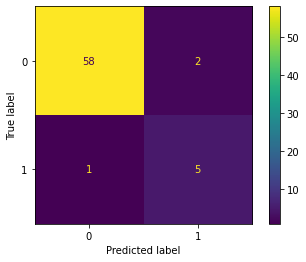

In [83]:
 mc=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(dfCalculado['Class'],dfCalculado['PredBin']),display_labels=['0','1'])
mc.plot()

In [84]:
print(f"Accuracy:{accuracy_score(dfCalculado['Class'],dfCalculado['PredBin'])}")
print(f"Precision:{precision_score(dfCalculado['Class'],dfCalculado['PredBin'])}")
print(f"Recall:{recall_score(dfCalculado['Class'],dfCalculado['PredBin'])}")
print(f"AUC:{roc_auc_score(dfCalculado['Class'],dfCalculado['PredBin'])}")

Accuracy:0.9545454545454546
Precision:0.7142857142857143
Recall:0.8333333333333334
AUC:0.9


In [51]:
# Vamos a comprobar el funcionamiento del modelo ya entrenado con nuevas imágenes
x2, y2 = cargar_imagenes('todo')

In [52]:
len(x2)

90

In [67]:
dfTodo = pd.DataFrame(x2.reshape(90,-1))
dfTodo

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,18,16,22,16,15,22,16,16,22,90,...,107,11,11,17,15,15,20,16,16,21
1,17,16,22,15,15,21,15,15,21,86,...,105,11,11,17,16,15,20,18,17,21
2,17,16,22,15,14,20,15,16,22,91,...,108,11,11,17,16,15,21,18,17,21
3,17,17,23,16,15,21,15,15,22,89,...,107,11,11,17,16,15,21,17,16,21
4,16,16,22,15,15,21,16,16,22,89,...,109,11,12,18,16,16,21,17,16,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,18,17,23,16,16,22,16,16,23,85,...,115,13,14,20,15,15,21,17,16,21
86,11,10,12,9,8,11,9,9,12,87,...,83,17,14,16,9,9,11,11,10,12
87,15,14,19,13,13,18,13,14,19,85,...,101,8,8,13,13,12,17,14,13,17
88,19,18,26,18,17,24,19,19,26,93,...,103,13,13,21,17,17,23,19,18,24


In [85]:
y_pred_todo = modelo.predict(dfTodo)
y_pred_todo

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1,  1, -1])

In [86]:
# Crear un df con df, añadiendo y_pred
dfCalculado = pd.DataFrame(y_pred_todo,columns=['Pred'])
dfAux = pd.DataFrame(y2,columns=['Class'])
dfCalculado = pd.concat([dfTodo, dfAux, dfCalculado],axis=1)
dfCalculado

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,Class,Pred
0,18,16,22,16,15,22,16,16,22,90,...,11,17,15,15,20,16,16,21,0,1
1,17,16,22,15,15,21,15,15,21,86,...,11,17,16,15,20,18,17,21,0,1
2,17,16,22,15,14,20,15,16,22,91,...,11,17,16,15,21,18,17,21,0,1
3,17,17,23,16,15,21,15,15,22,89,...,11,17,16,15,21,17,16,21,0,1
4,16,16,22,15,15,21,16,16,22,89,...,12,18,16,16,21,17,16,21,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,18,17,23,16,16,22,16,16,23,85,...,14,20,15,15,21,17,16,21,1,-1
86,11,10,12,9,8,11,9,9,12,87,...,14,16,9,9,11,11,10,12,1,-1
87,15,14,19,13,13,18,13,14,19,85,...,8,13,13,12,17,14,13,17,1,-1
88,19,18,26,18,17,24,19,19,26,93,...,13,21,17,17,23,19,18,24,1,1


In [87]:
dfCalculado['Class'].value_counts()/len(dfCalculado)*100

0    66.666667
1    33.333333
Name: Class, dtype: float64

In [88]:
dfCalculado['Pred'].value_counts()/len(dfCalculado)*100

 1    73.333333
-1    26.666667
Name: Pred, dtype: float64

In [89]:
# Métrica del modelo (estamos haciendo trampa ya que en un caso real no tendríamos la variable Class)
# Vamos a utlizar las mismas métricas que un clasificación binaria, ya que es como si estuviéramso
# haciendo una clasificación 0-Normal, 1-Anómala

# Tranformar Target para que tome valores 0 si es normal o 1 si anómala
dfCalculado.loc[dfCalculado['Pred']==1,'PredBin']=0
dfCalculado.loc[dfCalculado['Pred']==-1,'PredBin']=1

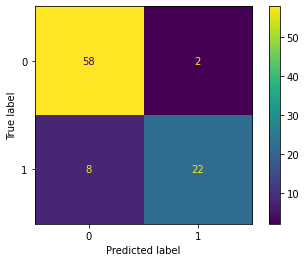

In [90]:
 mc=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(dfCalculado['Class'],dfCalculado['PredBin']),display_labels=['0','1'])
mc.plot()

In [91]:
print(f"Accuracy:{accuracy_score(dfCalculado['Class'],dfCalculado['PredBin'])}")
print(f"Precision:{precision_score(dfCalculado['Class'],dfCalculado['PredBin'])}")
print(f"Recall:{recall_score(dfCalculado['Class'],dfCalculado['PredBin'])}")
print(f"AUC:{roc_auc_score(dfCalculado['Class'],dfCalculado['PredBin'])}")

Accuracy:0.8888888888888888
Precision:0.9166666666666666
Recall:0.7333333333333333
AUC:0.8500000000000001


In [76]:
# Con los parámetros por defecto el resultado es muy malo.
#Accuracy:0.6777777777777778
#Precision:1.0
#Recall:0.03333333333333333
#AUC:0.5166666666666667

# Si a en la empresa pesa más la imagen que el dinero, el resultado no es bueno ya que el recall esmuy bajo
# Pero si la empresa tiene más en cuenta los aspectos económicos, y prefiere
# que no se identiquen cepillo buenos como malos, el resultado es muy bueno. Precision de 1.

# Vamos a probar cambiando el nº de vecinos a 5.
#Accuracy:0.8888888888888888
#Precision:0.9166666666666666
#Recall:0.7333333333333333
#AUC:0.8500000000000001

#Las métricas han mejorado notablemente.

# 5 ISOLATION FOREST <a name=""></a>
[Índice](#indice)

In [92]:
modelo = IsolationForest()
y_pred = modelo.fit_predict(df)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1])

In [93]:
# Crear un df con df, añadiendo y_pred
dfCalculado = pd.DataFrame(y_pred,columns=['Pred'])
dfAux = pd.DataFrame(y,columns=['Class'])
dfCalculado = pd.concat([df, dfAux, dfCalculado],axis=1)
dfCalculado

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,Class,Pred
0,18,16,22,16,15,22,16,16,22,90,...,11,17,15,15,20,16,16,21,0,1
1,17,16,22,15,15,21,15,15,21,86,...,11,17,16,15,20,18,17,21,0,1
2,17,16,22,15,14,20,15,16,22,91,...,11,17,16,15,21,18,17,21,0,1
3,17,17,23,16,15,21,15,15,22,89,...,11,17,16,15,21,17,16,21,0,1
4,16,16,22,15,15,21,16,16,22,89,...,12,18,16,16,21,17,16,21,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,18,17,23,16,16,22,16,16,23,85,...,14,20,15,15,21,17,16,21,1,-1
62,11,10,12,9,8,11,9,9,12,87,...,14,16,9,9,11,11,10,12,1,-1
63,15,14,19,13,13,18,13,14,19,85,...,8,13,13,12,17,14,13,17,1,-1
64,19,18,26,18,17,24,19,19,26,93,...,13,21,17,17,23,19,18,24,1,-1


In [94]:
dfCalculado['Class'].value_counts()/len(dfCalculado)*100

0    90.909091
1     9.090909
Name: Class, dtype: float64

In [95]:
dfCalculado['Pred'].value_counts()/len(dfCalculado)*100

 1    87.878788
-1    12.121212
Name: Pred, dtype: float64

In [96]:
# Métrica del modelo (estamos haciendo trampa ya que en un caso real no tendríamos la variable Class)
# Vamos a utlizar las mismas métricas que un clasificación binaria, ya que es como si estuviéramso
# haciendo una clasificación 0-Normal, 1-Anómala

# Tranformar Target para que tome valores 0 si es normal o 1 si anómala
dfCalculado.loc[dfCalculado['Pred']==1,'PredBin']=0
dfCalculado.loc[dfCalculado['Pred']==-1,'PredBin']=1

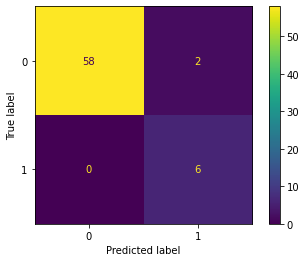

In [97]:
 mc=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(dfCalculado['Class'],dfCalculado['PredBin']),display_labels=['0','1'])
mc.plot()

In [98]:
print(f"Accuracy:{accuracy_score(dfCalculado['Class'],dfCalculado['PredBin'])}")
print(f"Precision:{precision_score(dfCalculado['Class'],dfCalculado['PredBin'])}")
print(f"Recall:{recall_score(dfCalculado['Class'],dfCalculado['PredBin'])}")
print(f"AUC:{roc_auc_score(dfCalculado['Class'],dfCalculado['PredBin'])}")

Accuracy:0.9696969696969697
Precision:0.75
Recall:1.0
AUC:0.9833333333333334


In [99]:
y_pred_todo = modelo.predict(dfTodo)

In [100]:
# Crear un df con df, añadiendo y_pred
dfCalculado = pd.DataFrame(y_pred_todo,columns=['Pred'])
dfAux = pd.DataFrame(y2,columns=['Class'])
dfCalculado = pd.concat([dfTodo, dfAux, dfCalculado],axis=1)
dfCalculado

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,Class,Pred
0,18,16,22,16,15,22,16,16,22,90,...,11,17,15,15,20,16,16,21,0,1
1,17,16,22,15,15,21,15,15,21,86,...,11,17,16,15,20,18,17,21,0,1
2,17,16,22,15,14,20,15,16,22,91,...,11,17,16,15,21,18,17,21,0,1
3,17,17,23,16,15,21,15,15,22,89,...,11,17,16,15,21,17,16,21,0,1
4,16,16,22,15,15,21,16,16,22,89,...,12,18,16,16,21,17,16,21,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,18,17,23,16,16,22,16,16,23,85,...,14,20,15,15,21,17,16,21,1,-1
86,11,10,12,9,8,11,9,9,12,87,...,14,16,9,9,11,11,10,12,1,-1
87,15,14,19,13,13,18,13,14,19,85,...,8,13,13,12,17,14,13,17,1,-1
88,19,18,26,18,17,24,19,19,26,93,...,13,21,17,17,23,19,18,24,1,-1


In [101]:
dfCalculado['Class'].value_counts()/len(dfCalculado)*100

0    66.666667
1    33.333333
Name: Class, dtype: float64

In [102]:
dfCalculado['Pred'].value_counts()/len(dfCalculado)*100

 1    66.666667
-1    33.333333
Name: Pred, dtype: float64

In [103]:
# Métrica del modelo (estamos haciendo trampa ya que en un caso real no tendríamos la variable Class)
# Vamos a utlizar las mismas métricas que un clasificación binaria, ya que es como si estuviéramso
# haciendo una clasificación 0-Normal, 1-Anómala

# Tranformar Target para que tome valores 0 si es normal o 1 si anómala
dfCalculado.loc[dfCalculado['Pred']==1,'PredBin']=0
dfCalculado.loc[dfCalculado['Pred']==-1,'PredBin']=1

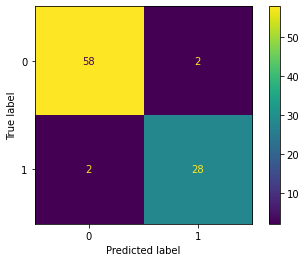

In [104]:
 mc=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(dfCalculado['Class'],dfCalculado['PredBin']),display_labels=['0','1'])
mc.plot()

In [105]:
print(f"Accuracy:{accuracy_score(dfCalculado['Class'],dfCalculado['PredBin'])}")
print(f"Precision:{precision_score(dfCalculado['Class'],dfCalculado['PredBin'])}")
print(f"Recall:{recall_score(dfCalculado['Class'],dfCalculado['PredBin'])}")
print(f"AUC:{roc_auc_score(dfCalculado['Class'],dfCalculado['PredBin'])}")

Accuracy:0.9555555555555556
Precision:0.9333333333333333
Recall:0.9333333333333333
AUC:0.95


In [ ]:
# Se obtine muy buen resultado tanto con las imágenes de entrenamiento como con las nuevas
# Al igual que en el ejemplo de las tarjetas de crédito, este modelo funciona 
# mucho mejor que el LOF